# Tarea 2 Machine Learning - Métodos para clasificación 

Juan Pablo Muñoz - 201373522-3 

Margarita Bugueño Pérez - 201373510-K

 ### 1- Tipos de fronteras en Clasificación


Como se ha discutido en clases, los problemas de clasificación pueden ser representados de distintas maneras, en donde estas representaciones definen un espacio de entrada del dominio de los datos. Los ejemplos dentro del espacio de entrada (manifold) pueden tener distintas formas, donde estas indicarán si es que estos ejemplos tendrán fronteras lineales o no.  
Con el propósito de analizar los distintos tipos de fronteras que definen los algoritmos de clasificación, se trabajará con un dataset sintético de 2 dimensiones conformado por dos conjuntos de datos, pudiendo ver que la frontera entre ellos claramente no es lineal. Uno de los conjuntos es ovalado, generado a traves de una distribución multivariada gaussiana, y el otro es una semi-luna, generada a través de funciones senos y cosenos.  
Se agrega ruido en los conjuntos para que no sea un problema trivial.  

El código que los genera es:

In [1]:
import numpy as np
n_samples=500
#promedio de los datos // Media de la distribución N-dimensional.
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
from sklearn.utils import check_random_state
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

In [2]:
print (datos1.shape)
print (outer_circ_x.shape)
print (outer_circ_y.shape)
print (datos2.shape)

(500, 2)
(500,)
(500,)
(500, 2)


Así entonces, el conjunto 1, compuesto por 500 datos centrados en (0,-4) con matriz de covarianza C, corresponde a una muestra aleatoria de una distribución normal multivariada. Mientras que el conjunto 2 corresponde efectivamente a una muestra aleatoria de 500 datos igualmente, sujetos a funciones Sin y Cos.


###### a. Construir un dataset común con los dos conjuntos generados. Luego, realizar un shift desde el conjunto 2 al 1, donde el conjunto de color naranjo (media luna) tiene puntos azules a la derecha pertenecientes al otro conjunto, esto es con el propósito de trabajar con un dataset no ideal.  
###### Determinar cuántos registros contiene cada conjunto y visualızarlos

In [3]:
X = np.concatenate((datos1, datos2), axis=0)
n = 20 #ruido
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)

In [4]:
print (X.shape)
print ("La cantidad de registros para el conjunto de datos 1 (óvalo) corresponde a: ", len(y1))
print ("La cantidad de registros para el conjunto de datos 2 (semiluna) corresponde a: ", len(y2))

(1000, 2)
La cantidad de registros para el conjunto de datos 1 (óvalo) corresponde a:  520
La cantidad de registros para el conjunto de datos 2 (semiluna) corresponde a:  480


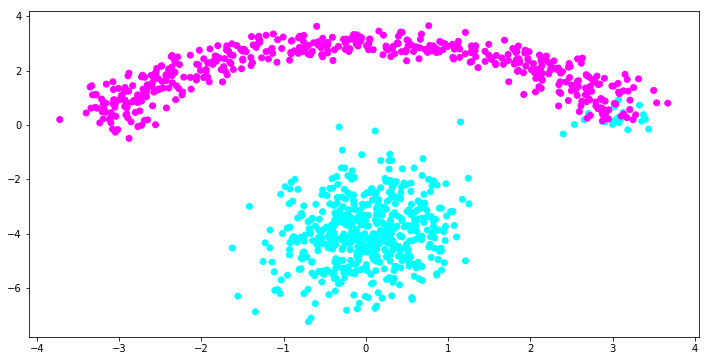

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='cool')
plt.show()

El conjunto 1 contiene 520 registros mientras que el conjunto 2 contiene 480. Esto se debe a que se realizó un shift de 20 registros (ruido) entre ellos con el fin de trabajar sobre un dataset no ideal, tal como ya se indicó y como se puede visualizar en el gráfico anterior expuesto. 

##### Para visualizar las fronteras producidas por los diferentes algoritmos clasificadores se utilizará:

In [6]:
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(16,8))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

###### b. Entrenar el clasificador Linear Discriminant Analysis (LDA) y visualizar la frontera de decisión que éste define.   

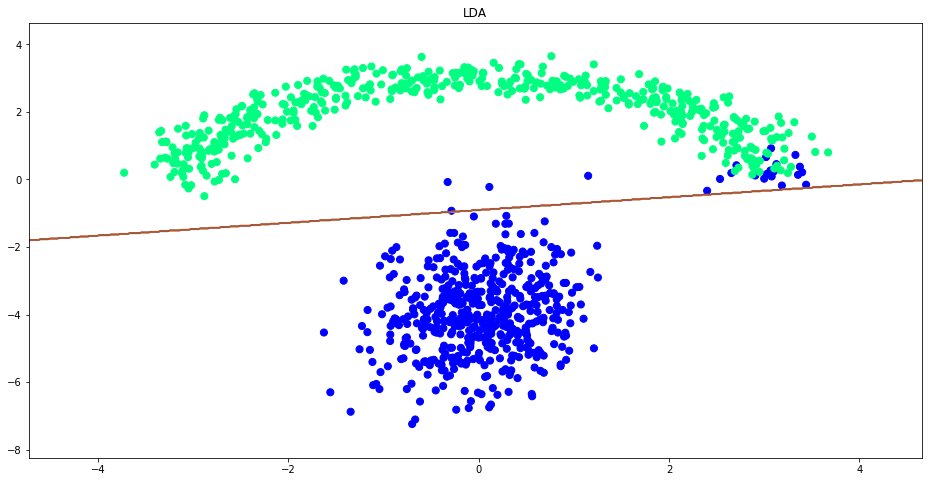

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
modelL = LDA()
modelL.fit(X,y)
visualize_border(modelL,X,y,"LDA")

Se observa claramente que la frontera determinada por el algoritmo, entre ambos conjuntos de datos, se trata de una frontera lineal. Esto se debe a que el algoritmo asume matrices de covarianza iguales entre los diferentes conjuntos de datos (además de distribución gaussiana multivariada), dejando a cada una de estas guassianas en igual dirección, precisando de una separación lineal.   

Se logra apreciar un buen desempeño del algoritmo. Sin embargo, algunos puntos resultan ser clasificados de manera incorrecta quedando por sobre la frontera establecida puesto que la distribución de los datos de trabajo no requieren, evidentemente, de una separación lineal. Una clase describe una semiluna y la otra clase un óvalo de manera tal que ambos conjuntos no se hayan lo suficientemente separados como para permitir una frontera de tales características que no clasifique incorrectamente algunos puntos marginales.   

###### c. Entrenar el clasificador Quadratic Discriminant Analysis (QDA) y visualizar la frontera de decisión que éste define.


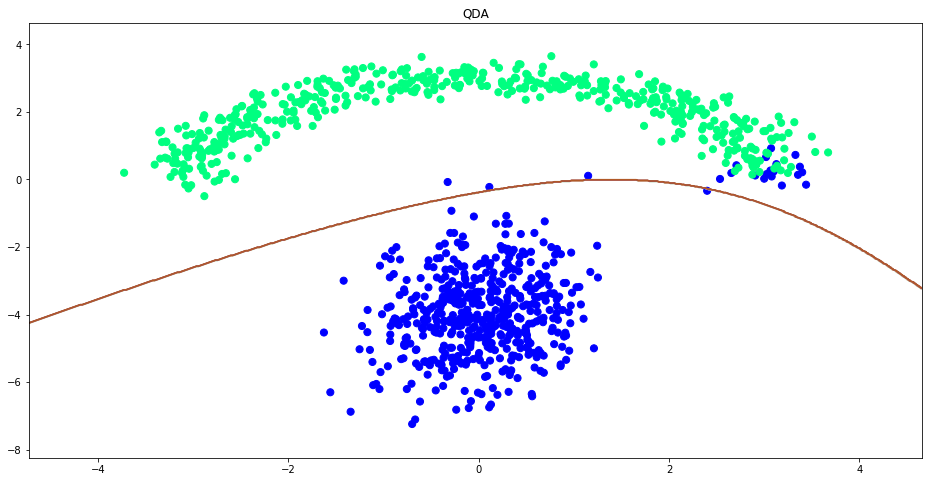

In [8]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
modelQ = QDA()
modelQ.fit(X,y)

visualize_border(modelQ,X,y,"QDA")

A diferencia de LDA, QDA logra un mejor desempeño clasificando de manera diferenciada los conjuntos de datos. Es decir, diferencia de mejor manera las diferentes etiquetas de los datos en cuestión pues emplea una frontera cuadrática que le permite ser mucho más flexible que una recta.

Tanto LDA como QDA se derivan de modelos probabilísticos que modelan la distribución condicional de las clases (etiquetas) de los datos.  Las predicciones de éstas se obtienen utilizando la regla de Bayes y seleccionando aquella que maximice la probabilidad $P(y=k|x)$, siendo $y$ la etiqueta/clase asignada. O, más específicamente, se modelan como una distribución gaussiana multivariada.  

En el caso de LDA, se supone que las distribuciones gaussianas de los diferentes conjuntos de datos (clases) comparten la misma matriz de covarianza, lo  que conduce a fronteras de decisión lineales.  

En el caso de QDA, no hay suposiciones sobre las matrices de covarianza de las distribuciones gaussianas, conduciendo a fronteras de decisión cuadráticas. Tal como se puede evidenciar en los gráficos obtenidos.

###### d. Compare cuantitativamente los clasificadores LDA Y QDA en este dataset sintetico mediante la metrica de error de clasificación.

In [9]:
from sklearn.metrics import accuracy_score
yLDA = modelL.predict(X)
yQDA = modelQ.predict(X)
print("Miss Classification Loss - LDA: %f"%(1-accuracy_score(y, yLDA)))
print("Miss Classification Loss - QDA: %f"%(1-accuracy_score(y, yQDA)))

Miss Classification Loss - LDA: 0.024000
Miss Classification Loss - QDA: 0.022000


Se observa que el algoritmo de LDA logra un desempeño bastante aceptable pero levemente inferior a QDA puesto que éste último, la hacer uso de una frontera cuadrática, lo posiciona como un algoritmo mucho más potente. Sin embargo, ésto puede variar dependiendo de los datos con los cuales se trabaje. 

Para este caso en particular, la métrica **Miss Classification Loss ** en cuanto a **LDA** fue de 2.2% mientras que para **QDA**, 1.9%


### ANALISIS QUEDO IGUAAAAAL D: MIREEEEN

###### Para lo que sigue de la actividad se trabajara con una widget interactiva de sintonización de parámetros de regularización para los distintos algoritmos.  Por ello cada vez que se modifique el parámetro en la ventana se entrenará el modelo y se visualizará la frontera en la misma imagen.

In [10]:
from ipywidgets import interactive
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)

###### e. Construir una función que entrene/ajuste un modelo de Regresión Logística Regularizado

In [11]:
from sklearn.linear_model import LogisticRegression as LR
def train_model(param):
    model=LR() #define your model
    model.set_params(C=param,penalty='l2')
    model.fit(X,y)
    print ("Vector beta: ", model.coef_)
    return model
p_min = 0.1
p_max = 1000
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

\begin{equation}
f_{RLog} = \ \ Min_{\beta} \left[\frac{\beta^T \beta}{2C} + \sum_{i=1}^{n} \ \ Log(exp (-y(X^T \beta))+1)\right]
\end{equation}

Se puede apreciar que cuando el parámetro de regularización del modelo de regresión logística aplicado por la librería ($C$) (inverso del parámetro tradicional) corresponde a un valor alto, entonces el desempeño del algoritmo se corresponde con una Regresión Logística no regularizada puesto que el lado izquierdo de la función objetivo del modelo ($f_{RLog}$) tiende a cero.   


Si C $\rightarrow \infty$
\begin{equation}
\frac{\beta^T \beta}{2C}  \rightarrow 0
\end{equation}

A continuación, con el fin de validar este análisis y para mayor comprensión del lector, se muestra el vector $\beta$ obtenido según el algoritmo para las diferentes configuraciones del parámetro C donde se evidencia la poca, o casi nula, variación/regularización de los coeficientes $\beta_i$ traduciéndose en la no variabilidad de la frontera propuesta.

In [12]:
model=LR()
for i in range(100, 1000, 20):
    model.set_params(C=i,penalty='l2')
    model.fit(X,y)
    print (model.coef_)

[[-0.93329093  5.62049041]]
[[-0.9351105   5.63465154]]
[[-0.93642291  5.644869  ]]
[[-0.93741428  5.65258897]]
[[-0.93818959  5.6586275 ]]
[[-0.93881254  5.66348001]]
[[-0.93932401  5.66746468]]
[[-0.93975149  5.67079523]]
[[-0.94011408  5.67362052]]
[[-0.94042553  5.67604741]]
[[-0.94069593  5.67815464]]
[[-0.94093291  5.68000145]]
[[-0.94114229  5.68163331]]
[[-0.94132864  5.68308569]]
[[-0.94149556  5.68438665]]
[[-0.94164593  5.6855587 ]]
[[-0.9417821  5.6866201]]
[[-0.941906    5.68758581]]
[[-0.9420192   5.68846821]]
[[-0.94212303  5.68927764]]
[[-0.94221862  5.69002278]]
[[-0.94230691  5.69071101]]
[[-0.9423887   5.69134861]]
[[-0.94246469  5.69194096]]
[[-0.94253546  5.69249272]]
[[-0.94260155  5.69300792]]
[[-0.9426634   5.69349008]]
[[-0.9427214   5.69394227]]
[[-0.94277591  5.69436721]]
[[-0.94282722  5.69476729]]
[[-0.94287562  5.69514463]]
[[-0.94292135  5.69550111]]
[[-0.94296461  5.69583842]]
[[-0.94300561  5.69615806]]
[[-0.94304452  5.69646138]]
[[-0.94308149  5.69674

In [13]:
p_min = 0.0001
p_max = 0.9
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

Ahora bien, si el parámetro de regularización es un valor bajo, el algoritmo de Regresión Logística efectivamente se comporta como un método regularizado. Esto ocurre debido a que la parte izquierda de la función objetivo del modelo en cuestión ($f_{RLog}$), mientras más pequeño sea el valor de C, más fuerte regulariza al vector $\beta$.  
Esto se evidencia en la frontera graficada (C = 0.0001), la cual varia notablemente respecto a los valores altos para el parámetro. 

A continuación, de manera similar a lo anteriormente expuesto, se muestra el vector $\beta$ obtenido según el algoritmo para los diferentes valores del parámetro C donde se evidencia el nivel de regularización del algoritmo para cada una de estas configuraciones.  
Cabe destacar que el nivel de regularización más fuerte se produce, tal como ya se indicó, cuando $C$ toma el valor más bajo.

In [14]:
model=LR()
for i in np.arange(0.0001, 0.1, 0.005):
    model.set_params(C=i,penalty='l2')
    model.fit(X,y)
    print (model.coef_)

[[-0.00596338  0.11559292]]
[[-0.10719229  0.88360176]]
[[-0.14498343  1.08806247]]
[[-0.17051779  1.21843726]]
[[-0.19043998  1.31629716]]
[[-0.20705054  1.39575787]]
[[-0.22129252  1.46262994]]
[[-0.23391147  1.52101405]]
[[-0.2452529   1.57291746]]
[[-0.25557589  1.6197679 ]]
[[-0.26506388  1.66255532]]
[[-0.273852    1.70199484]]
[[-0.28204301  1.73862026]]
[[-0.28980756  1.77314768]]
[[-0.29708954  1.80553592]]
[[-0.30398775  1.83613506]]
[[-0.31044688  1.86487831]]
[[-0.31664877  1.89241122]]
[[-0.32256823  1.91869457]]
[[-0.32823147  1.94385241]]


###### f. Construir una función que entrene/ajuste una Máquina de Vectores de Soporte Lineal. 

Support Vector Machine para clasificación (o Support Vector Classification), basado en la librería 'libsvm',  busca separar las clases de los datos analizados mediante un hiperplano.   
Las características de este hiperplano corresponden a que tiene la mayor distancia a los datos de entrenamiento más cercanos de cualquier clase. Esto con el fin de minimizar el error de generalización del clasificador.  
Para lograr su objetivo, SVC establece la siguiente función objetivo: 

\begin{equation}
f_{SVM} = \ \ Min_{\beta, b, \zeta} \left[ \frac{\beta^T \beta}{2C} + \sum_{i=1}^{n} \zeta\right]
\end{equation}
Sujeto a: 
\begin{equation}
y_i(\beta^T \phi(x_i) + b) \geq 1 - \zeta, \\ \zeta_i \geq 0 \ \ i=1, \ldots, n \\
\end{equation}

A continuación se presenta el desempeño del algoritmo SVM bajo un kernel **lineal**, lo que indica que la frontera de clasificación de los datos (clase 1 o 2) definida corresponde a una recta.

In [15]:
def visualize_border_interactiveL(param):
    model = train_modelL(param)
    visualize_border(model,X,y)

In [16]:
from sklearn.svm import SVC as SVM 
def train_modelL(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y)
    print ("Vectores de soporte: \n", model.support_vectors_)
    print ("\n Vector beta: ", model.coef_)
    print ("\n El número de vectores de soporte es: ", model.n_support_)
    return model

In [17]:
minimo=0.0001
maximo=500
interactive(visualize_border_interactiveL,param=(minimo,maximo))

A Jupyter Widget

Similar al comportamiento que tiene el algoritmo de Regresión Logística, se aprecia que cuando el parámetro de regularización ($C$) toma valores altos, el desempeño del algoritmo se corresponde al de una Máquina de Vectores de Soporte no regularizada puesto que el lado izquierdo de la función objetivo del modelo ($f_{SVM}$) tiende a cero.   

Si C $\rightarrow \infty$
\begin{equation}
\frac{\beta^T \beta}{2C}  \rightarrow 0
\end{equation}

Bajo esta configuración ($C$=499.9), se aprecia que los vectores de soporte (datos anaranjados) que definen la frontera obtenida corresponden a:

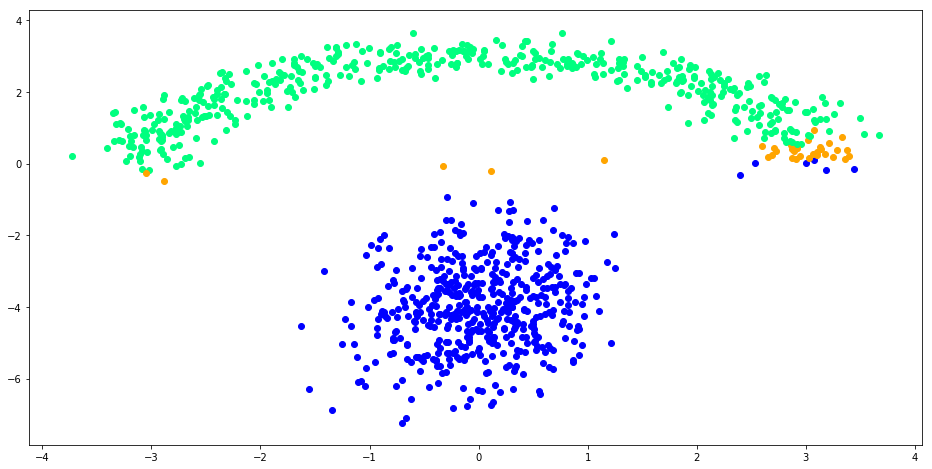

In [18]:
svm= SVM().set_params(C=499.9,kernel='linear').fit(X,y)
sv= svm.support_vectors_
fig = plt.figure(figsize=(16,8))
colors= ['blue', 'springgreen', 'orange']
j=1
for i in X:
    if i in sv:
        plt.scatter(i[0],i[1],c=colors[2])
    elif j<=520:
        plt.scatter(i[0],i[1],c=colors[0])
    elif j>520:    
        plt.scatter(i[0],i[1],c=colors[1])
    j+=1
plt.show()

# hablar de los vectores de soporte! D: (abajo igual hay que rellenar)
Así entonces, con el fin de analizar qué ocurre con los vectores de soporte cuando el parámetro de regularización se disminuye, se estableció el valor de $C$ como 0.01: 

In [19]:
minimo=0.01
maximo=10
interactive(visualize_border_interactiveL,param=(minimo,maximo))

A Jupyter Widget

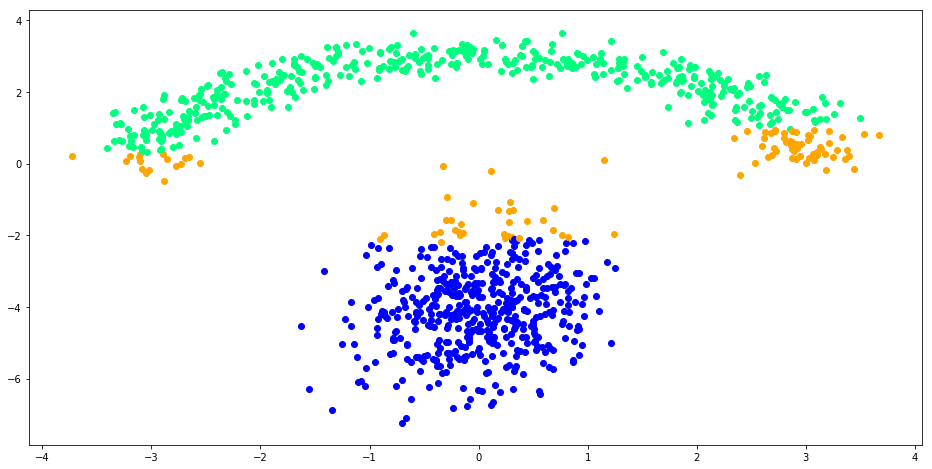

In [20]:
svm= SVM().set_params(C=0.01,kernel='linear').fit(X,y)
sv= svm.support_vectors_
fig = plt.figure(figsize=(16,8))
colors= ['blue', 'springgreen', 'orange']
j=1
for i in X:
    if i in sv:
        plt.scatter(i[0],i[1],c=colors[2])
    elif j<=520:
        plt.scatter(i[0],i[1],c=colors[0])
    elif j>520:    
        plt.scatter(i[0],i[1],c=colors[1])
    j+=1
plt.show()

Donde se aprecia que, el número de vectores de soporte con los cuales trabajó el algoritmo aumenta. Esto se debe a que, cuando $C$ disminuye, la parte izquierda de $f_{SVM}$ aumenta teniendo que trabajarse la función de optimización completa. 

Por lo tanto, es correcto afirmar que si se trabaja con un parámetro de regularización bajo, SVM efectivamente se comporta como un método regularizado. Esto ocurre debido a que en la parte izquierda de la función objetivo del modelo ($f_{SVM}$), cuanto más pequeño sea el valor de C, más fuerte se regulariza el vector $\beta$.  
De manera gráfica, se puede notar que para $C$ = 0.0001, la frontera definida varia notablemente respecto a los valores altos de $C$.

In [21]:
minimo=0.0001
maximo=0.4
interactive(visualize_border_interactiveL,param=(minimo,maximo))

A Jupyter Widget

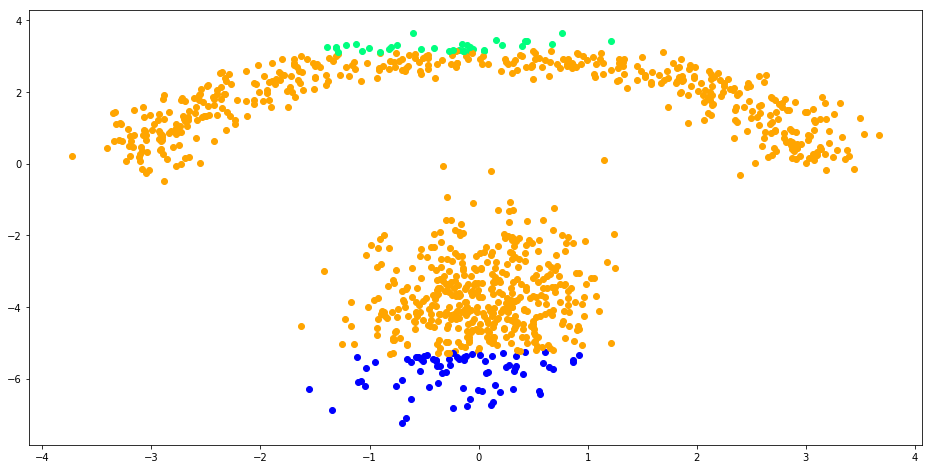

In [22]:
svm= SVM().set_params(C=0.0001,kernel='linear').fit(X,y)
sv= svm.support_vectors_
fig = plt.figure(figsize=(16,8))
colors= ['blue', 'springgreen', 'orange']
j=1
for i in X:
    if i in sv:
        plt.scatter(i[0],i[1],c=colors[2])
    elif j<=520:
        plt.scatter(i[0],i[1],c=colors[0])
    elif j>520:    
        plt.scatter(i[0],i[1],c=colors[1])
    j+=1
plt.show()

La cantidad de vectores de soporte definidos por el algoritmo aumentó considerablemente. Esto se explica desde el punto de vista de que, como ya se mencionó, mientras más bajo sea $C$, más regularizado será el modelo. Es decir, el algoritmo intenta lograr que $\beta \rightarrow 0$, haciendo mucho más compleja, en términos de decisión, la clasificación de los datos. Por ello, para poder disernir con mayor seguridad entre la clase positiva o negativa, se debe trabajar sobre una base de datos mayor. Así entonces, la cantidad de vectores de soporte, tal como se ve en el gráfico, corresponde a una porción considerable del dataset de entrenamiento.   

Ahora bien, respecto a la eficacia del modelo, podemos asegurar que trabaja bastante bien frente al ruido estableciendo una frontera de decisión que separa las clases correspondientemente y lo mayormente posible entre ambas.

###### g. Construir una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) no Lineal.

A diferencia de la SVM entrenada anteriormente, en este ítem se trabaja con otros métodos de kernel como lo son:  
1. Poly
2. RBF  
3. Sigmoid

#### 1. Poly (polinomial)

$K(\vec{x},\vec{x'}) = (1+\vec{x}^T \vec{x'})^d$, donde $d$ espedifica el grado del polinomio 

In [23]:
def visualize_border_interactiveNL(param):
    model = train_modelNL(param)
    visualize_border(model,X,y)

In [24]:
#edit the train_model function
from sklearn.svm import SVC as SVM #SVC is for classification
def train_modelNL(param):
    model= SVM()
    model.set_params(C=param,kernel='poly',degree=3) 
    model.fit(X,y)
    print ("Vectores de soporte: \n", model.support_vectors_)
    print ("\n El número de vectores de soporte es: ", model.n_support_)
    return model

In [25]:
minimoNL= 0.01
maximoNL= 100
interactive(visualize_border_interactiveNL,param=(minimoNL,maximoNL))

A Jupyter Widget

Al trabajar con un kernel polinomial de grado 3, se aprecia que cuando $C$ toma valores altos (es decir, cuando      $\frac{\beta^T \beta}{2C}  \rightarrow 0$), la frontera definida por el algoritmo se trata de una frontera lineal. No así, cuando $C$ tiene a valores pequeños. En estos casos se aprecia de manera clara la correspondencia entre la forntera obtenida y el kernel aplicado por el algoritmo, tal como se nota en el siguiente gráfico:

# no se por que para C grande la frontera es lineal si tiene poli d=3

In [26]:
minimoNL= 0.01
maximoNL= 10
interactive(visualize_border_interactiveNL,param=(minimoNL,maximoNL))

A Jupyter Widget

Cabe destacar, que la frontera obtenida logra muy bien el objetivo de maximizar la distancia entre la clase positiva y clase negativa a lo largo de toda la distribución de datos de entrenamiento por lo que se acepta como una buena configuración para la aplicación de SVM. Ahora bien, lo que ocurre con los vectores de soporte para el nivel de parametrización 0.01, corresponde a: 

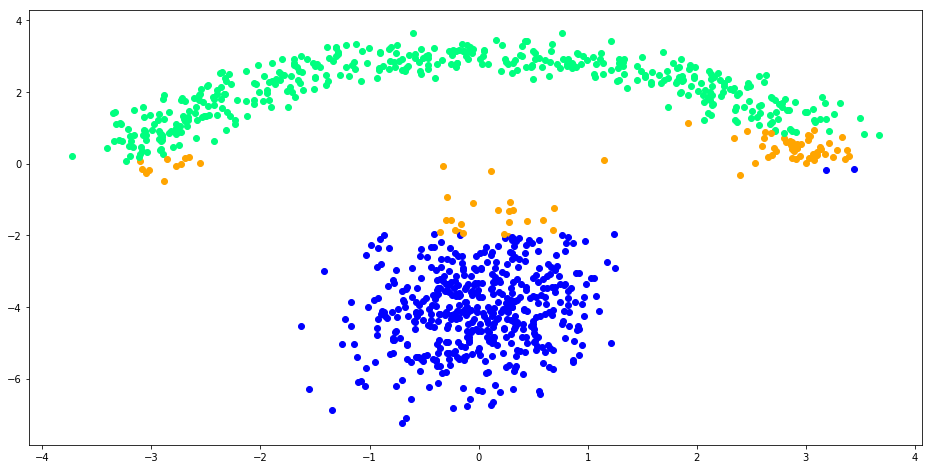

In [27]:
svm= SVM().set_params(C=0.01,kernel='poly', degree=3).fit(X,y)  
sv= svm.support_vectors_
fig = plt.figure(figsize=(16,8))
colors= ['blue', 'springgreen', 'orange']
j=1
for i in X:
    if i in sv:
        plt.scatter(i[0],i[1],c=colors[2])
    elif j<=520:
        plt.scatter(i[0],i[1],c=colors[0])
    elif j>520:    
        plt.scatter(i[0],i[1],c=colors[1])
    j+=1
plt.show()

Vemos que para $C$= 0.01 la cantidad de vectores de soporte no varia considerablemente respecto de la última configuración (kernel lineal), por lo que se puede decir que la complejidad de establecimiento de dicha frontera no representa un aumento respecto al modelo anterior.   

En cambio, si modificamos el nivel de regularización a 0.00001 se observa:

In [28]:
minimoNL= 0.00001
maximoNL= 10
interactive(visualize_border_interactiveNL,param=(minimoNL,maximoNL))

A Jupyter Widget

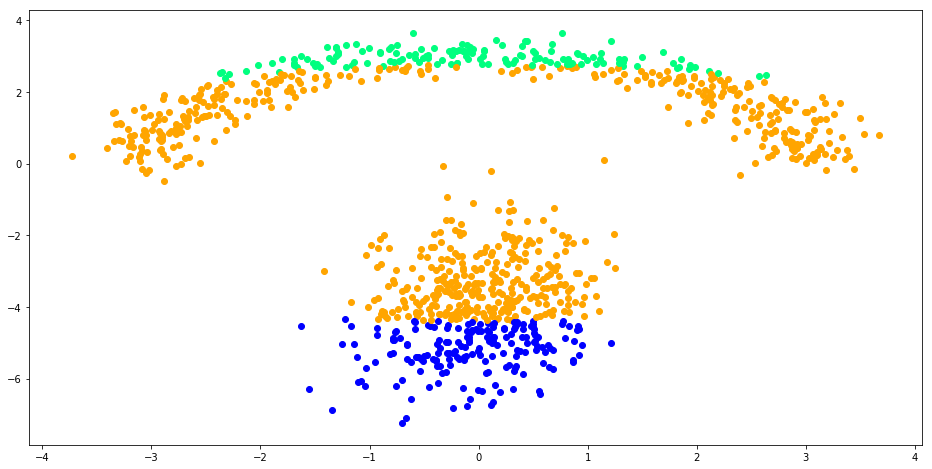

In [29]:
svm= SVM().set_params(C=0.00001,kernel='poly', degree=3).fit(X,y)  
sv= svm.support_vectors_
fig = plt.figure(figsize=(16,8))
colors= ['blue', 'springgreen', 'orange']
j=1
for i in X:
    if i in sv:
        plt.scatter(i[0],i[1],c=colors[2])
    elif j<=520:
        plt.scatter(i[0],i[1],c=colors[0])
    elif j>520:    
        plt.scatter(i[0],i[1],c=colors[1])
    j+=1
plt.show()

donde la cantidad de vectores de soporte aumentó enormemente (344), indicando también, que la complejidad para el establecimiento de dicha frontera es muy alto y que se requiere de una porción mucho más grande de datos pertenecientes al training set.  
De igual manera, es posible notar que la frontera establecida no separa de buena manera las clases, encontrándose numerables casos de mal clasificación (clase incorrecta). Esto, probablemente se traducirá en un mal comportamiento frente a datos futuros.

###### Qué ocurre con un kernel cuadrático?

Se modificó el kernel de la pultima configuración del algoritmo de clasificación SVM, con lo cual se obtuvo un comportamiento bastante similar, en términos de eficacia y eficiencia, al kernel de grado 3 con $C$=0.00001.  


In [30]:
from sklearn.svm import SVC as SVM 
def train_modelNL(param):
    model= SVM()
    model.set_params(C=param,kernel='poly',degree=2) 
    model.fit(X,y)
    print ("Vectores de soporte: \n", model.support_vectors_)
    print ("\n El número de vectores de soporte es: ", model.n_support_)
    return model

In [31]:
minimoNL= 0.01
maximoNL= 10
interactive(visualize_border_interactiveNL,param=(minimoNL,maximoNL))

A Jupyter Widget

El número de vectores de soporte con $C$=0.01 fue alto (239) y la frontera de decisión no logra un buen comportamiento frente a los datos de entrenamiento (lo que no varía de manera considerable al modificar el valor del parámetro de regularización). 

##### RBF, Radial Basis Function

De manera intuitiva, el parámetro $gamma$ define qué tanto influye un dato de entrenamiento. Si su valor es bajo, entonces la frontera en base a los datos de entrenamiento será lejana. Si el valor es alto, será cercana. Es decir, $gamma$ se asemeja al inverso del radio de influencia de los datos de entrenamiento seleccionados por el algoritmo (vectores de soporte).

El parámetro $C$ representa un tradeoff entre la malclasificación de los datos de entrenamiento, versus la simplicidad de la frontera de decisión propuesta. Así entonces, un valor del parámetro $C$ bajo, provocará que la superficie sea simple pero incorrecta, mientras que un valor alto tenrá como objetivo clasificar correctamente los datos.

In [32]:
from sklearn.svm import SVC as SVM 
def train_modelNL(param):
    model= SVM()
    model.set_params(C=param,kernel='rbf',gamma=0.7) 
    model.fit(X,y)
    print ("Vectores de soporte: \n", model.support_vectors_)
    print ("\n El número de vectores de soporte es: ", model.n_support_)
    return model

In [33]:
minimoNL= 0.01
maximoNL= 50
interactive(visualize_border_interactiveNL,param=(minimoNL,maximoNL))

A Jupyter Widget

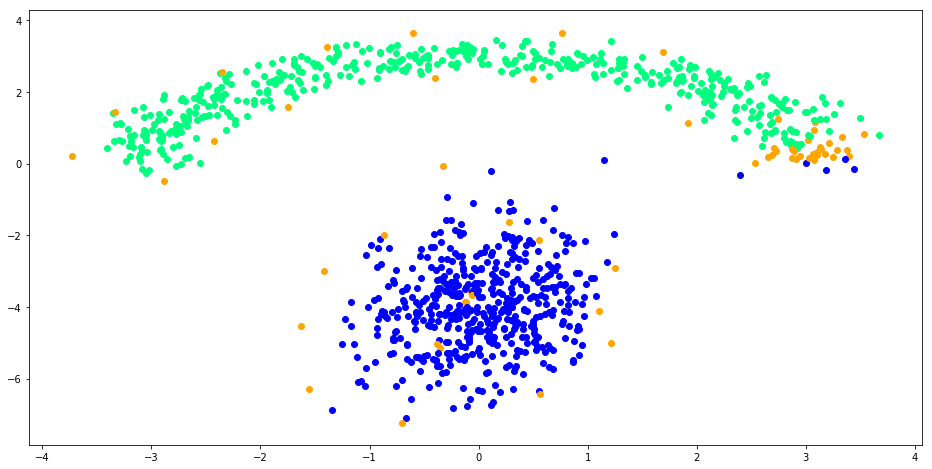

In [34]:
svm= SVM().set_params(C=49.9,kernel='rbf',gamma=0.7).fit(X,y)  
sv= svm.support_vectors_
fig = plt.figure(figsize=(16,8))
colors= ['blue', 'springgreen', 'orange']
j=1
for i in X:
    if i in sv:
        plt.scatter(i[0],i[1],c=colors[2])
    elif j<=520:
        plt.scatter(i[0],i[1],c=colors[0])
    elif j>520:    
        plt.scatter(i[0],i[1],c=colors[1])
    j+=1
plt.show()

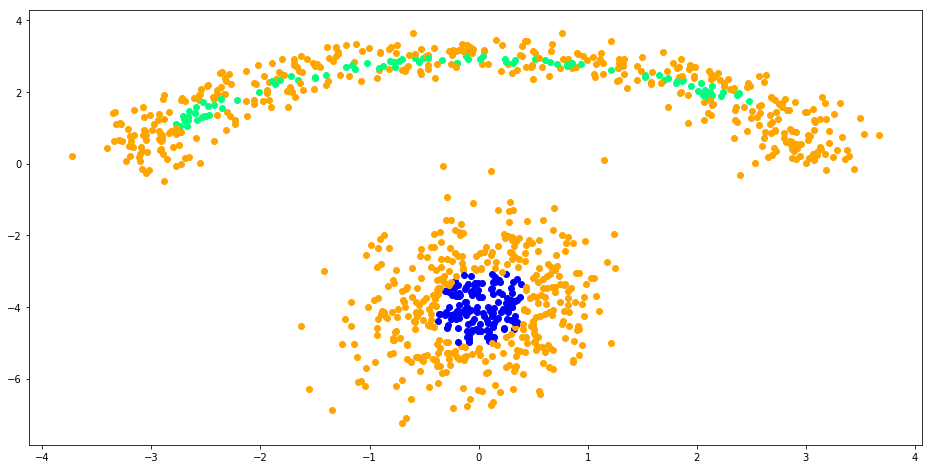

In [35]:
svm= SVM().set_params(C=0.01,kernel='rbf',gamma=0.7).fit(X,y)  
sv= svm.support_vectors_
fig = plt.figure(figsize=(16,8))
colors= ['blue', 'springgreen', 'orange']
j=1
for i in X:
    if i in sv:
        plt.scatter(i[0],i[1],c=colors[2])
    elif j<=520:
        plt.scatter(i[0],i[1],c=colors[0])
    elif j>520:    
        plt.scatter(i[0],i[1],c=colors[1])
    j+=1
plt.show()

En el gráfico presentado se evidencian (de color anaranjado) los vectores de soporte definidos para la determinación de la frontera de decisión para las clases en cuestión.  
Para el gráfico cuyo prámetro de regularización es 49.9 se logra una frontera de decisión mucho mejor que para $C$=0.01 necesitando menos vectores de soporte que para $C$ pequeño, es decir, para un modelo regularizado. 

A continuación se modifica el parámetro 'gamma' para analizar sus efectos:

In [36]:
from sklearn.svm import SVC as SVM 
def train_modelNL(param):
    model= SVM()
    model.set_params(C=param,kernel='rbf',gamma=2) 
    model.fit(X,y)
    print ("Vectores de soporte: \n", model.support_vectors_)
    print ("\n El número de vectores de soporte es: ", model.n_support_)
    return model
    return model

minimoNL= 0.01
maximoNL= 10
interactive(visualize_border_interactiveNL,param=(minimoNL,maximoNL))

A Jupyter Widget

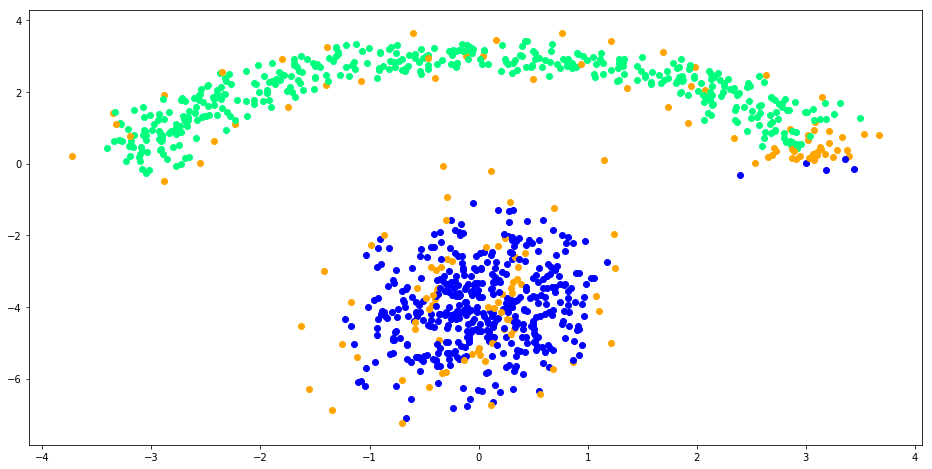

In [37]:
svm= SVM().set_params(C=9.9, kernel='rbf',gamma=2).fit(X,y)  
sv= svm.support_vectors_
fig = plt.figure(figsize=(16,8))
colors= ['blue', 'springgreen', 'orange']
j=1
for i in X:
    if i in sv:
        plt.scatter(i[0],i[1],c=colors[2])
    elif j<=520:
        plt.scatter(i[0],i[1],c=colors[0])
    elif j>520:    
        plt.scatter(i[0],i[1],c=colors[1])
    j+=1
plt.show()

Respecto a la última confugración de gamma utilizada y manteniendo el parámetro $C$, es posible mencionar que el número de vectores de soporte aumentó a aproximadamente el doble, indicando que la complejidad del establecimiento de la frontera de decisión es mayor. Esto puede explicarse debido a la modificación del parámetro 'gamma' puesto que éste se aumentó, es decir, se le ordenó trabajar con una frontera de menor radio al algoritmo teniendo que valerse de una mayor porción de datos de entrenamiento para ello.

El análisis de lo que ocurre con un valor pequeño para $C$ se obvia puesto que ya se demostró la poca eficacia y  eficiencia de esta configuración frente a un kernel tipo 'rbf'.


###### Sigmoid

$K(\vec{x},\vec{x'}) =   tanh (\gamma \cdot \vec{x}^T \vec{x'} + 1)$

A continuación se modifica el kernel a trabajar por el algoritmo hacia 'sigmoid' con parámetros propios del kernel por defecto. Lo que observa es lo siguiente:

In [38]:
from sklearn.svm import SVC as SVM 
def train_modelNL(param):
    model= SVM()
    model.set_params(C=param,kernel='sigmoid')
    model.fit(X,y)
    print ("Vectores de soporte: \n", model.support_vectors_)
    print ("\n El número de vectores de soporte es: ", model.n_support_)
    return model

minimoNL= 0.01
maximoNL= 10
interactive(visualize_border_interactiveNL,param=(minimoNL,maximoNL))

A Jupyter Widget

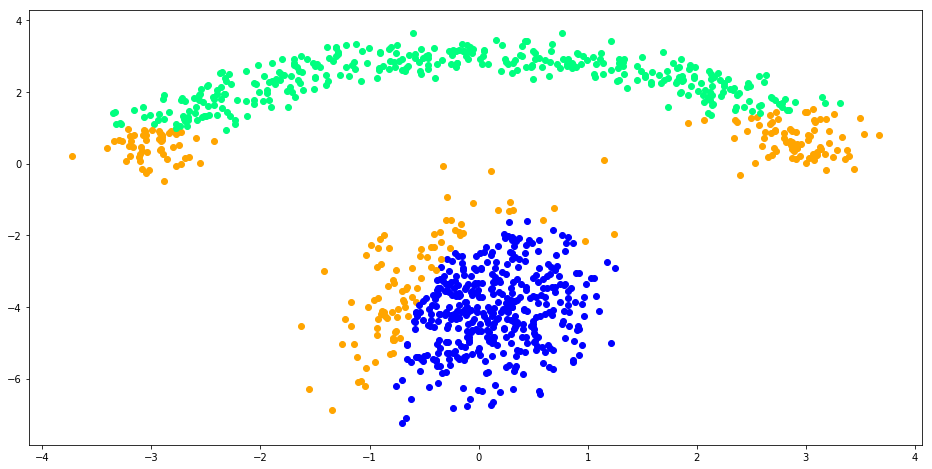

In [39]:
svm= SVM().set_params(C=0.01, kernel='sigmoid').fit(X,y)  
sv= svm.support_vectors_
fig = plt.figure(figsize=(16,8))
colors= ['blue', 'springgreen', 'orange']
j=1
for i in X:
    if i in sv:
        plt.scatter(i[0],i[1],c=colors[2])
    elif j<=520:
        plt.scatter(i[0],i[1],c=colors[0])
    elif j>520:    
        plt.scatter(i[0],i[1],c=colors[1])
    j+=1
plt.show()

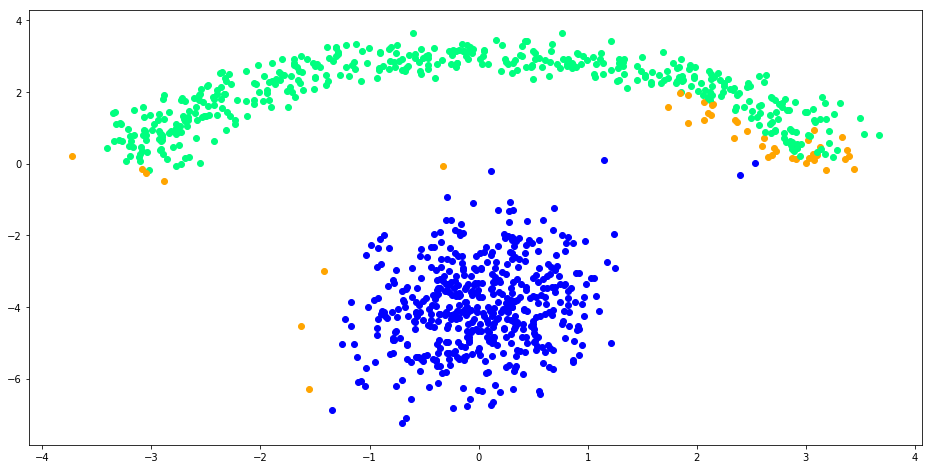

In [40]:
svm= SVM().set_params(C=9.9, kernel='sigmoid').fit(X,y)  
sv= svm.support_vectors_
fig = plt.figure(figsize=(16,8))
colors= ['blue', 'springgreen', 'orange']
j=1
for i in X:
    if i in sv:
        plt.scatter(i[0],i[1],c=colors[2])
    elif j<=520:
        plt.scatter(i[0],i[1],c=colors[0])
    elif j>520:    
        plt.scatter(i[0],i[1],c=colors[1])
    j+=1
plt.show()

Si bien esta última configuración hace uso de pocos datos de entrenamiento (vectores de soporte) para lograr establecer la frontera de decisión, en términos de eficacia, no resulta ser una buena opción la adopción de este kernel (bajo los parámetros por defecto de la libreria) puesto que existen muchos datos mal clasificados cuando $C$ toma valores pequeños. Cuando $C$ toma valores altos, si bien la clasificación no es tan equívoca, no logra superar el desempeño de otras configuraciones ya analizadas.  

A modo de conclusión, cuando los datos de entrenamiento son escasos, tal como en este ejercicio práctico, generalmente se cuenta con muchas fronteras que no presentan errores considerables. Entonces, es lógico preguntarse qué configuración se debe elegir para los futuros datos de test. Dada esta situación, aquella solución que logra el mayor margen posible entre el límite de decisión y los datos de la  clase en ambos lados se dice ser una buena opción.  
Esta decisión se basa en la idea de que es probable que un nuevo dato de la clase positiva caiga dentro o cerca de la frontera de la región (lo mismo para la clase negativa), Por lo tanto, asignar el mayor margen, proporciona mayor seguridad a la hora de clasificar los datos minimizando las posibilidades de que los datos crucen hacia la región equivocada.

Si bien el parámetro de regularización $C$ se utiliza con el fin de, como ya se ha mencionado, 'castigar' los pesos del vector $\beta$, se observa que no siempre un valor bajo ayudará a la definición de la mejor frontera de decisión pues el valor dependerá del kernel en uso y, aún más importante, asignar un valor demasiado extremista para el parámetro de regularización $C$ podría hacernos caer en overfitting puesto que se sobreajusta la frontera de decisión a los datos de entrenamiento no asegurando el objetivo principal de un algoritmo de aprendizaje automático, generalizar para lograr un buen comportamiento frente a los futuros datos.

###### h. Construir un Árbol de Decisión de múltiples niveles para la clasificación del problema. 

A continuación se ponen a prueba los distintos criterios de medición de calidad que existen para una división en un algoritmo de árbol. 

1. 'Gini' 
2. 'Entropy' 

A partir de cada una de estas configuraciones se trabajará con la altura de cada árbol. Es decir, el número de splits que se realizan a cada región de clase, alternando de característica. Como para este caso sólo se cuenta con 2 atributos, entonces el primer split se realizará en base a, por ejemplo, A_0 mientras que el segundo en base a A_1, el tercero ramificará las regiones obtenidas según una nueva decisión en base a A_0 y la cuarta en base a A_1, etc.  


######  1. Gini 

Medida de cuán a menudo un elemento escogido aleatoriamente sería etiquetado incorrectamente de acuerdo a la distribución de las etiquetas en el conjunto de entrenamiento.  

In [45]:
from sklearn.tree import DecisionTreeClassifier as Tree
def train_modelT(param):
    model = Tree() 
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X,y)
    return model

In [46]:
def visualize_border_interactiveT(param):
    model = train_modelT(param)
    visualize_border(model,X,y)

In [48]:
minimoT= 1
maximoT= 15
interactive(visualize_border_interactiveT,param=(minimoT,maximoT))

A Jupyter Widget

Haciendo uso del criterio Gini, se observa que para niveles de altura mayores o iguales a 10 no representan una variación al árbol de altura 9. De manera similar, desde el nivel 6 en adelante no se observan modificaciones considerables en el árbol de clasificación puesto que las regiones de la clase positiva o negativa no varían de manera evidente. Aún así, a mayor altura del árbol, mejor es el ajuste que éste tiene frente a los datos de entrenamiento. La pregunta es, ¿Esto se mantiene para futuros datos?  

Para responder esta pregunta se propone analizar el criterio Entropy y así determinar qué configuración es la de mejor comportamiento frente a los datos.


###### 2.  Entropy o ganancia de información

In [50]:
from sklearn.tree import DecisionTreeClassifier as Tree
#edit the train_model function
def train_modelT(param):
    model = Tree() #edit the train_model function
    model.set_params(max_depth=param,criterion='entropy',splitter='best')
    model.fit(X,y)
    return model

minimoT= 1
maximoT= 15
interactive(visualize_border_interactiveT,param=(minimoT,maximoT))

A Jupyter Widget

Para el criterio de clasificación Entropy, el árbol no presenta un nivel $N$ a partir del cual no se vea modificada la estructura de las regiones establecidas. Pero, de manera similar a la configuración basada en el criterio Gini, a partir del nivel 5-6 no se aprecian modificaciones considerables en ellas.   
Si se destaca la variación en cuanto a las variables por las que se realizan los primeros 2 splits puesto que rápidamente se llega a una definición de regiones muy clara y diferente que con criterio Entropy. Evidentemente las regiones obtenidas difieren donde para el primer caso se obtuvo una región similar a un cuadrado (inferior derecho), mientras que para Entropy se obtuvo una región correspondiente al rectángulo inferior de la imagen aproximadamente.

Puesto que para ambos casos, Gini y Entropy, cuando la altura del árbol se setea a valores altos, no se logran modificaciones importantes en las regiones definidas por el árbol, se procede a analizar qué ocurre cuando se especifica 'min_samples_split' que indica el porcentaje de datos mínimo requerido para hacer válido el split.  

Se setea este valor a 0.02%, es decir, 20 puntos de los 1000 datos de entrenamiento donde se observa:

In [51]:
def train_modelT(param):
    model = Tree() #edit the train_model function
    model.set_params(max_depth=param,criterion='entropy',splitter='best', min_samples_split=0.02)
    model.fit(X,y)
    return model

minimoT= 2
maximoT= 15
interactive(visualize_border_interactiveT,param=(minimoT,maximoT))

A Jupyter Widget

Para alturas mayores a 6 no existen splits válidos puesto que el número de datos que caerían en la nueva sección de la clase en cuestión (región en cuestión) no supera el umbral establecido. Así entonces, se logra definir un árbol de clasificación que no caiga en overfitting puesto que no se sobreajusta el modelo a los datos de entrenamiento esperando lograr un buen desempeño frente a datos futuros.  

Recordar: A mayor altura, mayor nivel de especificación de cada región establecida. 

###### i. Construir un algoritmo K-NN para la clasificación del problema. 

### Mediante la imagen interactiva explore diferentes valores del parámetro k. Discuta el significado y efecto esperado de este par ́ametro. Analice cualitativamente lo observado.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
#edit the train_model function
def train_modelK(param):
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    model.fit(X,y)
    return model

In [27]:
def visualize_border_interactiveK(param):
    model = train_modelK(param)
    visualize_border(model,X,y)

In [28]:
minimoK= 1
maximoK= 100
interactive(visualize_border_interactiveK,param=(minimoK,maximoK))

A Jupyter Widget

# Obtener las predicciones y ver cul es mejor??? :s 


### 2- Análisis de audios como datos brutos

Distintos tipos de datos han sido tratados en el área de Machine Learning, donde el analisis de estos y el manejo para poder dejarlos en una representación que se pueda entregar como entrada al algoritmo es crucial. El manejo sobre los datos brutos se denomina pre-procesamiento y existen distintos dependiendo del tipo de datos y los distintos diminios, tales como imagenes, audios, texto.  
En esta actividad se trabajará con datos de audios los cuales son directamente extraıdos desde datos fuentes .wav, lo que corresponde a una señal de sonido en diferentes tiempos.

El dataset se denomina Heartbeat Sounds [3] y es presentado en la plataforma Kaggle a trav ́es del siguiente
link. Este dataset consta de grabaciones de sonidos de latidos card ́ıacos normales y anormales, con distintas
categor ́ıas para los latidos anormales.
Para la tarea se trabajar ́
a con el dataset A presente en la data, el cual corresponde a datos generados desde
la v ́ıa p ́
ublica mediante la aplicaci ́
on de Iphone iStethoscope Pro. El objetivo ser ́a el de clasificar cada sonido
como latido card ́ıaco normal o una de las las subcategor ́ıas de anormal (Murmur, Extra Heart Sound, Arti-
fact), por lo que se trata de un problema de clasificaci ́on m ́
ultiple con 4 clases. Las distintas clasificaciones
para los sonidos son explicadas en el sitio de Kaggle.
Para leer y trabajar los archivos de extensi ́on .wav se utilizar ́a el siguiente c ́odigo:

In [29]:
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name

SAMPLE_RATE = 44100

def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

a. Construya un dataframe con los datos a analizar. Describa el dataset y determine cu ́antos registros hay
por clase.

In [30]:
import pandas as pd
import numpy as np
df = pd.read_csv('./heartbeat-sounds/set_a.csv')

FileNotFoundError: File b'./heartbeat-sounds/set_a.csv' does not exist

b. Lea los archivos .wav y transformelos en secuencias de tiempo. Realice un padding de ceros al final de
cada secuencia para que todas queden representadas con la misma cantidad de elementos, explique la
importancia de realizar este paso.

In [ ]:
def padd_zeros(array,length):
aux = np.zeros(length)
aux[:array.shape[0]] = array
return aux
new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelled')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='path/to/set_a/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))

c. Manipule los datos y cambie las etiquetas de los audios por otras asignadas por un doctor experto [4],
el cual afirma que estos cambios son requeridos. Vuelva a determinar cu ́antos registros hay por clase.
N ́
otese que ahora son 3 clases ¿Explique la problem ́atica de tener etiquetas mal asignadas en los datos?
¿Un solo dato puede afectar esto?

In [ ]:
new_labels =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1,
2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]

d. Codifique las distintas clases a valores num ́ericos para que puedan ser trabajados por los algoritmos
clasificadores.

In [ ]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)

e. Desordene los datos, evitando as ́ı el orden en el que vienen la gran mayor ́ıa de las etiquetas. Cree la
matriz que conforma a los datos en sus dimensiones sin preprocesar, es decir, cada ejemplo es una
secuencia de amplitudes en el tiempo. ¿Las dimensiones de  ́esta indica que puede generar problemas?
¿De qu ́e tipo?

In [ ]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
X.shape

f. Para pre procesar la secuencia en el tiempo realice una transformada de fourier discreta [5] para pasar
los datos desde el dominio de tiempos al dominio de frecuencias presentes en la se ̃
nal de sonido.

In [ ]:
X_fourier = np.abs(np.fft.fft(X))

g. Para seguir con el pre procesamiento realice un muestreo representativo de los datos a trav ́es de una
t ́ecnica de muestreo especializada en secuencias ¿En qu ́e beneficia este paso? ¿C ́omo podr ́ıa determinar
si el muestro es representativo?

In [ ]:
from scipy import signal
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
X_resampled.shape

h. Genere un conjunto de pruebas mediante la t ́ecnica hold-out validation para verificar la calidad de los
clasificadores. ¿Cu ́
antas clases tiene y de qu ́e tama ̃
no queda cada conjunto?

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y,
test_size=0.25, random_state=42)


i. Realice un proceso de estandarizar los datos para ser trabajados adecuadamente. Recuerde que solo se
debe ajustar (calcular media y desviaci ́on est ́andar) con el conjunto de entrenamiento.


In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

j. Realice una reducci ́
on de dimensionalidad a trav ́es de la t ́ecnica PCA, para representar los datos en
d = 2 dimensiones. Recuerde que solo se debe ajustar (encontrar las componentes principales) con el
conjunto de entrenamiento. Visualice apropiadamente la proyecci ́on en 2 dimensiones.

In [ ]:
from sklearn.decomposition import PCA
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)

k. Entrene un modelo de Regresi ́
on Log ́ıstica variando el par ́ametro de regularizacion C construyendo un
gr ́
afico resumen del error en funci ́
on de este hiper-par ́ametro. Adem ́as entrene una M ́aquina de Soporte
Vectorial (SVM) con kernel lineal, variando el hiper-par ́ametro de regularizacion C en el mismo rango
que para la Regresi ́
on Log ́ıstica, construyendo el mismo gr ́afico resumen. Compare.

In [ ]:
Cs = [0.0001,0.01,0.1,1,10,100,1000]

l. Entrene un Arbol
de Decisi ́
on, con la configuraci ́on que estime conveniente, variando el hiper-par ́ametro
regularizador max depth, construyendo un gr ́afico resumen del error en funci ́on de este par ́ametro.
Compare con los modelos anteriores.

In [ ]:
Depths = range(1,30)

m. Experimente con diferentes dimensiones d para la proyecci ́on de PCA con el prop ́osito de obtener un
modelo con menor error. Construya una tabla o gr ́afico resumen.

n. Realice otra reducci ́
on de dimensionalidad ahora a trav ́es de la t ́ecnica LDA, para representar los datos
en d = 2 dimensiones. Recuerde que s ́olo se debe ajustar con el conjunto de entrenamiento, si se muestra
un warning explique el porqu ́e. Visualice apropiadamente la proyecci ́on en 2 dimensiones.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_lda = LDA(n_components=2)
model_lda.fit(X_train,y_train)
X_pca_train = model_lda.transform(X_train)
X_pca_test = model_lda.transform(X_test)

o. Con el prop ́
osito de encontrar el mejor modelo vuelva a realizar el item h) con el i) en el nuevo espacio
generado por la representaci ́
on seg ́
un las d dimensiones de la proyecci ́on LDA. Esta nueva representaci ́
on
¿mejora o empeora el desempe ̃
no? Explique.

p. Intente mejorar el desempe ̃
no de los algoritmos ya entrenados. Dise ̃
ne ahora sus propias cracter ́ısticas
(feature crafting) a partir de los datos brutos (secuencia de amplitudes), puede inspirarse en otros
trabajos [6] [7] si desea.

### 3. Análisis de emociones en tweets